# Simple Clustering using PySpark and Pixiedust for Data Visualization

# 1. Spark Initialization

In [1]:
 # Call findspark
import findspark
findspark.init()

# Import required library
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession \
    .builder \
    .appName("Tugas Clustering Big Data") \
    .getOrCreate()

print(spark)

# 2. Input Data 

The data that i'm going to use is the US Baby Names dataset from kaggle.com

In [2]:
df = spark.read.csv("C://Users//asus//Documents//Datasets//NationalNames.csv")

In [3]:
df.show()

+---+---------+----+------+-----+
|_c0|      _c1| _c2|   _c3|  _c4|
+---+---------+----+------+-----+
| Id|     Name|Year|Gender|Count|
|  1|     Mary|1880|     F| 7065|
|  2|     Anna|1880|     F| 2604|
|  3|     Emma|1880|     F| 2003|
|  4|Elizabeth|1880|     F| 1939|
|  5|   Minnie|1880|     F| 1746|
|  6| Margaret|1880|     F| 1578|
|  7|      Ida|1880|     F| 1472|
|  8|    Alice|1880|     F| 1414|
|  9|   Bertha|1880|     F| 1320|
| 10|    Sarah|1880|     F| 1288|
| 11|    Annie|1880|     F| 1258|
| 12|    Clara|1880|     F| 1226|
| 13|     Ella|1880|     F| 1156|
| 14| Florence|1880|     F| 1063|
| 15|     Cora|1880|     F| 1045|
| 16|   Martha|1880|     F| 1040|
| 17|    Laura|1880|     F| 1012|
| 18|   Nellie|1880|     F|  995|
| 19|    Grace|1880|     F|  982|
+---+---------+----+------+-----+
only showing top 20 rows



In [4]:
df.createOrReplaceTempView("babynames")

In [5]:
df.count()

1825434

In [6]:
df.schema

StructType(List(StructField(_c0,StringType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,StringType,true)))

# 3. Select Specific Data : Female Baby Names Throughout the Year 2000-2014

In [15]:

data=spark.sql("SELECT _c1, _c2, _c4 FROM babynames WHERE _c3='F' AND _C2 BETWEEN '2000' AND '2014'")

In [16]:
data.show()

+---------+----+-----+
|      _c1| _c2|  _c4|
+---------+----+-----+
|    Emily|2000|25952|
|   Hannah|2000|23073|
|  Madison|2000|19967|
|   Ashley|2000|17995|
|    Sarah|2000|17687|
|   Alexis|2000|17627|
| Samantha|2000|17264|
|  Jessica|2000|15704|
|Elizabeth|2000|15088|
|   Taylor|2000|15078|
|   Lauren|2000|14172|
|   Alyssa|2000|13552|
|    Kayla|2000|13310|
|  Abigail|2000|13087|
|  Brianna|2000|12873|
|   Olivia|2000|12852|
|     Emma|2000|12540|
|    Megan|2000|11433|
|    Grace|2000|11283|
| Victoria|2000|10922|
+---------+----+-----+
only showing top 20 rows



# 4. Converting String into Index

Because the Vector Assembler in PySpark cannot accept String DataType, we need to convert the data that we're going to train into index/tokenization, but here i'm going to use the StringIndexer module.

In [17]:
from pyspark.ml.feature import StringIndexer, IndexToString

In [18]:
indexer = StringIndexer(inputCol="_c4", outputCol="count_index").fit(data)
data_ind = indexer.transform(data)
data_ind.show()

+---------+----+-----+-----------+
|      _c1| _c2|  _c4|count_index|
+---------+----+-----+-----------+
|    Emily|2000|25952|     2512.0|
|   Hannah|2000|23073|     3709.0|
|  Madison|2000|19967|     2649.0|
|   Ashley|2000|17995|     2579.0|
|    Sarah|2000|17687|     3388.0|
|   Alexis|2000|17627|     3744.0|
| Samantha|2000|17264|     2335.0|
|  Jessica|2000|15704|     3184.0|
|Elizabeth|2000|15088|     2569.0|
|   Taylor|2000|15078|     3111.0|
|   Lauren|2000|14172|     2645.0|
|   Alyssa|2000|13552|     2873.0|
|    Kayla|2000|13310|     2029.0|
|  Abigail|2000|13087|     3455.0|
|  Brianna|2000|12873|     3505.0|
|   Olivia|2000|12852|     2394.0|
|     Emma|2000|12540|     2561.0|
|    Megan|2000|11433|     2233.0|
|    Grace|2000|11283|     2507.0|
| Victoria|2000|10922|     2061.0|
+---------+----+-----+-----------+
only showing top 20 rows



# 5. Assembling Vector

In [19]:
# Assembling Vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["count_index"],
    outputCol='features')

data_ind = assembler.transform(data_ind)
data_ind.show()

+---------+----+-----+-----------+--------+
|      _c1| _c2|  _c4|count_index|features|
+---------+----+-----+-----------+--------+
|    Emily|2000|25952|     2512.0|[2512.0]|
|   Hannah|2000|23073|     3709.0|[3709.0]|
|  Madison|2000|19967|     2649.0|[2649.0]|
|   Ashley|2000|17995|     2579.0|[2579.0]|
|    Sarah|2000|17687|     3388.0|[3388.0]|
|   Alexis|2000|17627|     3744.0|[3744.0]|
| Samantha|2000|17264|     2335.0|[2335.0]|
|  Jessica|2000|15704|     3184.0|[3184.0]|
|Elizabeth|2000|15088|     2569.0|[2569.0]|
|   Taylor|2000|15078|     3111.0|[3111.0]|
|   Lauren|2000|14172|     2645.0|[2645.0]|
|   Alyssa|2000|13552|     2873.0|[2873.0]|
|    Kayla|2000|13310|     2029.0|[2029.0]|
|  Abigail|2000|13087|     3455.0|[3455.0]|
|  Brianna|2000|12873|     3505.0|[3505.0]|
|   Olivia|2000|12852|     2394.0|[2394.0]|
|     Emma|2000|12540|     2561.0|[2561.0]|
|    Megan|2000|11433|     2233.0|[2233.0]|
|    Grace|2000|11283|     2507.0|[2507.0]|
| Victoria|2000|10922|     2061.

# 6. Train Model & Make Predictions

Here i'm going to train the data using K-Means, with value of K=5, since i'm using the elbow method in R to determine the optimal value of K and got the result of 5. 


In [20]:
# Train model
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(data_ind)

In [21]:
# Make a prediction
predictions = model.transform(data_ind)
predictions.show(100)

+----------+----+-----+-----------+--------+----------+
|       _c1| _c2|  _c4|count_index|features|prediction|
+----------+----+-----+-----------+--------+----------+
|     Emily|2000|25952|     2512.0|[2512.0]|         2|
|    Hannah|2000|23073|     3709.0|[3709.0]|         2|
|   Madison|2000|19967|     2649.0|[2649.0]|         2|
|    Ashley|2000|17995|     2579.0|[2579.0]|         2|
|     Sarah|2000|17687|     3388.0|[3388.0]|         2|
|    Alexis|2000|17627|     3744.0|[3744.0]|         2|
|  Samantha|2000|17264|     2335.0|[2335.0]|         4|
|   Jessica|2000|15704|     3184.0|[3184.0]|         2|
| Elizabeth|2000|15088|     2569.0|[2569.0]|         2|
|    Taylor|2000|15078|     3111.0|[3111.0]|         2|
|    Lauren|2000|14172|     2645.0|[2645.0]|         2|
|    Alyssa|2000|13552|     2873.0|[2873.0]|         2|
|     Kayla|2000|13310|     2029.0|[2029.0]|         4|
|   Abigail|2000|13087|     3455.0|[3455.0]|         2|
|   Brianna|2000|12873|     3505.0|[3505.0]|    

# 7. Evaluate

In [22]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9520294584880125


# 8. Data Visualization using Pixiedust

In [23]:
import pixiedust

Pixiedust database opened successfully



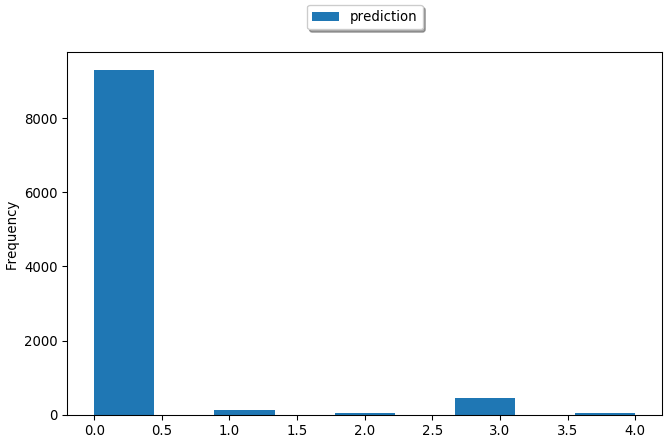

In [26]:
display(predictions)

![Cluster](img/cluster1.png)


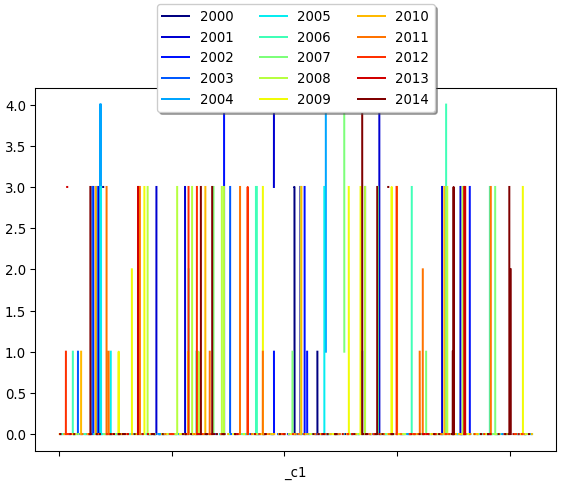

In [25]:
display(predictions)

![Cluster](img/cluster2.png)